In [2]:
import numpy as np
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sigmaclip

In [4]:
dataframe = pd.read_csv('dataanime.csv')

# Датасет цены недвижимости в г. Мельбрун

In [5]:
dataframe.head()

,Title,Type,Episodes,Status,Start airing,End airing,Starting season,Broadcast time,Producers,Licensors,Studios,Sources,Genres,Duration,Rating,Score,Scored by,Members,Favorites,Description
0,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,2009-4-5,2010-7-4,Spring,Sundays at 17:00 (JST),"Aniplex,Square Enix,Mainichi Broadcasting Syst...","Funimation,Aniplex of America",Bones,Manga,"Action,Military,Adventure,Comedy,Drama,Magic,F...",24 min. per ep.,R,9.25,719706,1176368,105387,"""In order for something to be obtained, someth..."
1,Kimi no Na wa.,Movie,1,Finished Airing,2016-8-26,-,-,-,"Kadokawa Shoten,Toho,Sound Team Don Juan,Lawso...","Funimation,NYAV Post",CoMix Wave Films,Original,"Supernatural,Drama,Romance,School",1 hr. 46 min.,PG-13,9.19,454969,705186,33936,"Mitsuha Miyamizu, a high school girl, yearns t..."
2,Gintama°,TV,51,Finished Airing,2015-4-8,2016-3-30,Spring,Wednesdays at 18:00 (JST),"TV Tokyo,Aniplex,Dentsu","Funimation,Crunchyroll",Bandai Namco Pictures,Manga,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi...",24 min. per ep.,R,9.16,70279,194359,5597,"Gintoki, Shinpachi, and Kagura return as the f..."
3,Steins;Gate 0,TV,23,Currently Airing,2018-4-12,-,Spring,Thursdays at 01:35 (JST),Nitroplus,Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",23 min. per ep.,PG-13,9.16,12609,186331,1117,The dark untold story of Steins;Gate that lead...
4,Steins;Gate,TV,24,Finished Airing,2011-4-6,2011-9-14,Spring,Wednesdays at 02:05 (JST),"Frontier Works,Media Factory,Movic,AT-X,Kadoka...",Funimation,White Fox,Visual novel,"Sci-Fi,Thriller",24 min. per ep.,PG-13,9.14,552791,990419,90365,The self-proclaimed mad scientist Rintarou Oka...


In [6]:
dataframe.shape

(1563, 20)

In [7]:
dataframe.columns

Index(['Title', 'Type', 'Episodes', 'Status', 'Start airing', 'End airing',
       'Starting season', 'Broadcast time', 'Producers', 'Licensors',
       'Studios', 'Sources', 'Genres', 'Duration', 'Rating', 'Score',
       'Scored by', 'Members', 'Favorites', 'Description'],
      dtype='object')

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            1563 non-null   object 
 1   Type             1563 non-null   object 
 2   Episodes         1563 non-null   object 
 3   Status           1563 non-null   object 
 4   Start airing     1563 non-null   object 
 5   End airing       1563 non-null   object 
 6   Starting season  1563 non-null   object 
 7   Broadcast time   1563 non-null   object 
 8   Producers        1563 non-null   object 
 9   Licensors        1563 non-null   object 
 10  Studios          1563 non-null   object 
 11  Sources          1563 non-null   object 
 12  Genres           1563 non-null   object 
 13  Duration         1563 non-null   object 
 14  Rating           1563 non-null   object 
 15  Score            1563 non-null   float64
 16  Scored by        1563 non-null   int64  
 17  Members       

Изобразим график цены

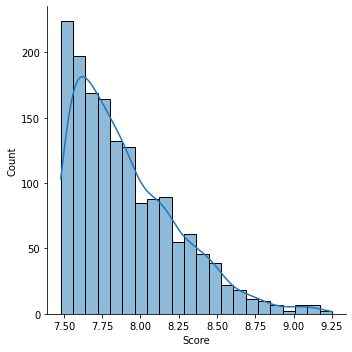

In [9]:
sns.displot(dataframe.Score, kde=True)

Как видно распределение не очень близко к нормальному, поэтому используем sigmaclip для приведения к нормальной форме

In [10]:
dataframe['Scored by'].unique()

array([719706, 454969,  70279, ...,  61505,   3054,  46334], dtype=int64)

In [11]:
dataframe['Favorites'].unique()

array([105387,  33936,   5597,   1117,  90365,   8370,   4533,  63324,
         1961,   1498,   1374,  18911,   2372,   1222,  47076,  33507,
         4078,  43856,  11246,  15225,   6480,   1477,  38990,    388,
         1360,    693,  38654,  10649,  10540,  62965,   4640,  11228,
        11763,    874,   7014,    506,  13951,  17849,  49556,   1060,
         9640,  30140,   8499,   1387,    123,    744,   2061,  87872,
          639,    372,   6549,  10880,  23414,    619,    973,   6965,
         2008,   9301,   6981,    101,    453,   2973,   3226,   1206,
          518,   2972,    445,   5154,   1347,    323,   4963,  20942,
         4352,   2494,  20971,   2388,   2851,   5516,    542,   2715,
         3387,    510,   3328,    435,  68985,  13317,     32,   1433,
        15676,     59,  12311,   4659,    499,   8657,   1718,   2093,
           86,   3557,  19309,  17683,   1019,   1065,   2812,  63317,
        16308,     21,   7295,  10852,   7312,   1104,     35,   5874,
      

In [ ]:
s1 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 1], 3.0, 3.0)[0]).iloc[:50]
s2 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 2], 3.0, 3.0)[0]).iloc[:50]
s3 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 3], 3.0, 3.0)[0]).iloc[:50]
s4 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 4], 3.0, 3.0)[0]).iloc[:50]
s5 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 5], 3.0, 3.0)[0]).iloc[:50]
s6 = pd.Series(sigmaclip(dataframe.Price[dataframe.Rooms == 6], 3.0, 3.0)[0]).iloc[:50]
df = pd.DataFrame(data = {'col1': s1.values,
                          'col2':s2.values,
                          'col3':s3.values,
                          'col4':s4.values,
                          'col5':s5.values,
                          'col6':s6.values})

s1 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 1.0], 3.0, 3.0)[0]).iloc[:50]
s2 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 2.0], 3.0, 3.0)[0]).iloc[:50]
s3 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 3.0], 3.0, 3.0)[0]).iloc[:50]
s4 = pd.Series(sigmaclip(dataframe.Price[dataframe.Bathroom == 4.0], 3.0, 3.0)[0]).iloc[:50]
df1 = pd.DataFrame(data = {'col1': s1.values, 'col2':s2.values, 'col3':s3.values, 'col4':s4.values})